# 構造学習

## データセット

In [2]:
from sklearn.datasets import load_boston

In [6]:
bstn = load_boston()

In [9]:
import pandas as pd

df = pd.DataFrame(bstn.data, columns=bstn.feature_names)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 偏相関係数

### 数式

$$r_{i,j} = \frac{A_{i,j}}{\sqrt{A_{i,i}A_{j,j}}}$$

- $r_{i,j}$: partial correlation with feature i vs feature j
- $A_{i,j}$: row i column j elements of Precision matrix

### 通常の方法で計算

In [11]:
import numpy as np

In [99]:
cov = df.cov() # Empirical covariance

In [100]:
acc = np.linalg.inv(cov)

In [101]:
df_acc = pd.DataFrame(acc, columns=df.columns, index=df.columns)

In [102]:
df_corr_part_scaler = np.sqrt(np.diag(df_acc).reshape(-1,1) @ np.diag(df_acc).reshape(-1,1).T)

In [103]:
df_corr_partial = df_acc / df_corr_part_scaler

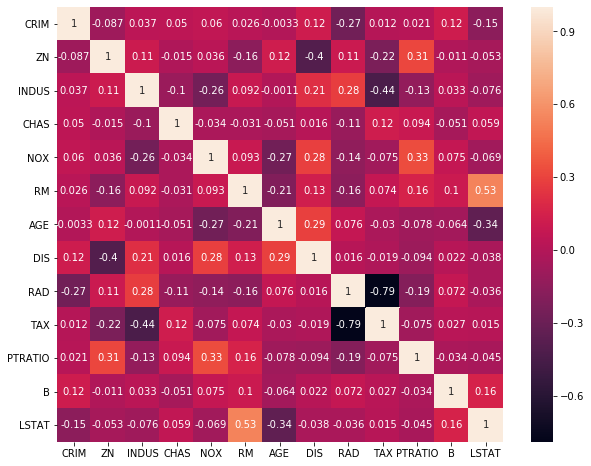

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_corr_partial, annot=True)

In [36]:
df_acc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.792192,-0.176906,0.099251,0.069415,0.167289,0.049012,-0.007876,0.311037,-0.977712,0.047616,0.037612,0.182527,-0.350608
ZN,-0.176906,2.298758,0.322131,-0.023198,0.113737,-0.328480,0.322145,-1.214303,0.438919,-1.015697,0.632811,-0.020089,-0.138160
INDUS,0.099251,0.322131,3.991596,-0.213270,-1.105465,0.255409,-0.003877,0.838852,1.521575,-2.626172,-0.348131,0.077167,-0.261071
CHAS,0.069415,-0.023198,-0.213270,1.073995,-0.072877,-0.044924,-0.092657,0.032501,-0.305064,0.376978,0.130193,-0.061750,0.105635
NOX,0.167289,0.113737,-1.105465,-0.072877,4.393720,0.272437,-0.978655,1.175405,-0.815201,-0.469311,0.926708,0.182237,-0.247222


In [105]:
import pandas as pd
import numpy as np

def calc_partial_corr(df:pd.DataFrame=None, cov:pd.DataFrame=None)->pd.DataFrame:
    """
    Parameters
    ----------    
    df : DataFrame, shape = [n_samples, n_features]
        dataset
    cov : DataFrame, shape = [n_features, n_features]
        covariance matrix
        
    Returns
    -------
    df_partial_corr : DataFrame, shape = [n_features, n_features]
        partial correlation matrix
    """
    if df is None: # use covariance dataframe
        if cov is None: raise "please specify df or cov"
        features = cov.columns
    else: # calculate covariance dataframe
        cov = df.cov()
        features = df.columns
    df_acc = pd.DataFrame(np.linalg.inv(cov), columns=features, index=features)
    df_corr_part_scaler = np.sqrt(
        np.diag(df_acc).reshape(-1,1) @ np.diag(df_acc).reshape(-1,1).T
    )
    df_partial_corr = df_acc / df_corr_part_scaler
    return df_partial_corr

In [106]:
calc_partial_corr(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.087157,0.037108,0.050034,0.059616,0.026328,-0.003341,0.116814,-0.266955,0.011850,0.020947,0.117410,-0.152702
ZN,-0.087157,1.000000,0.106344,-0.014764,0.035788,-0.155798,0.120661,-0.402675,0.105817,-0.223198,0.311173,-0.011410,-0.053132
INDUS,0.037108,0.106344,1.000000,-0.103004,-0.263970,0.091931,-0.001102,0.211099,0.278381,-0.437948,-0.129910,0.033261,-0.076191
CHAS,0.050034,-0.014764,-0.103004,1.000000,-0.033549,-0.031173,-0.050774,0.015768,-0.107599,0.121196,0.093661,-0.051310,0.059433
NOX,0.059616,0.035788,-0.263970,-0.033549,1.000000,0.093465,-0.265140,0.281933,-0.142157,-0.074596,0.329610,0.074867,-0.068768
RM,0.026328,-0.155798,0.091931,-0.031173,0.093465,1.000000,-0.206771,0.133560,-0.158075,0.074282,0.159475,0.104735,0.534928
AGE,-0.003341,0.120661,-0.001102,-0.050774,-0.265140,-0.206771,1.000000,0.291306,0.075801,-0.029949,-0.078192,-0.063729,-0.341111
DIS,0.116814,-0.402675,0.211099,0.015768,0.281933,0.133560,0.291306,1.000000,0.015854,-0.019467,-0.093614,0.021963,-0.038447
RAD,-0.266955,0.105817,0.278381,-0.107599,-0.142157,-0.158075,0.075801,0.015854,1.000000,-0.787962,-0.188920,0.072366,-0.035651
TAX,0.011850,-0.223198,-0.437948,0.121196,-0.074596,0.074282,-0.029949,-0.019467,-0.787962,1.000000,-0.075461,0.026646,0.015323


In [107]:
calc_partial_corr(cov=df.cov())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.087157,0.037108,0.050034,0.059616,0.026328,-0.003341,0.116814,-0.266955,0.011850,0.020947,0.117410,-0.152702
ZN,-0.087157,1.000000,0.106344,-0.014764,0.035788,-0.155798,0.120661,-0.402675,0.105817,-0.223198,0.311173,-0.011410,-0.053132
INDUS,0.037108,0.106344,1.000000,-0.103004,-0.263970,0.091931,-0.001102,0.211099,0.278381,-0.437948,-0.129910,0.033261,-0.076191
CHAS,0.050034,-0.014764,-0.103004,1.000000,-0.033549,-0.031173,-0.050774,0.015768,-0.107599,0.121196,0.093661,-0.051310,0.059433
NOX,0.059616,0.035788,-0.263970,-0.033549,1.000000,0.093465,-0.265140,0.281933,-0.142157,-0.074596,0.329610,0.074867,-0.068768
RM,0.026328,-0.155798,0.091931,-0.031173,0.093465,1.000000,-0.206771,0.133560,-0.158075,0.074282,0.159475,0.104735,0.534928
AGE,-0.003341,0.120661,-0.001102,-0.050774,-0.265140,-0.206771,1.000000,0.291306,0.075801,-0.029949,-0.078192,-0.063729,-0.341111
DIS,0.116814,-0.402675,0.211099,0.015768,0.281933,0.133560,0.291306,1.000000,0.015854,-0.019467,-0.093614,0.021963,-0.038447
RAD,-0.266955,0.105817,0.278381,-0.107599,-0.142157,-0.158075,0.075801,0.015854,1.000000,-0.787962,-0.188920,0.072366,-0.035651
TAX,0.011850,-0.223198,-0.437948,0.121196,-0.074596,0.074282,-0.029949,-0.019467,-0.787962,1.000000,-0.075461,0.026646,0.015323


### グラフィカルラッソで計算

In [56]:
from sklearn.covariance import GraphicalLassoCV

In [89]:
gl = GraphicalLassoCV(cv=5)

In [90]:
gl.fit(df)

GraphicalLassoCV(alphas=4, assume_centered=False, cv=5, enet_tol=0.0001,
                 max_iter=100, mode='cd', n_jobs=None, n_refinements=4,
                 tol=0.0001, verbose=False)

__Note:__ GraphicalLassoCV chose the best alpha that maximizes log-likelihood of test data

In [96]:
df_gl_cov = pd.DataFrame(gl.covariance_, columns=df.columns,
                       index=df.columns)

In [97]:
df_corr_partial_gl = calc_partial_corr(cov=df_gl_cov).round(4)

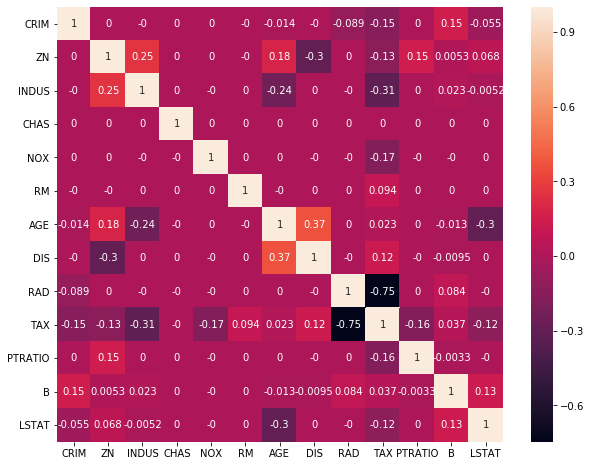

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_partial_gl, annot=True)

## 異常検知

### 数式

$$a_i(x) = \frac{1}{2}\ln\frac{2\pi}{A_{i,i}} + \frac{1}{2A_{i,i}}\left(\sum_{j=1}^M A_{i,j}x_j \right)^2$$

### 通常の方法で計算

### グラフィカルラッソで計算

## SQLによる異常検知の実装